In [2]:
#Imports

import pandas as pd
import scipy
import numpy as np
from scipy import stats
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import chi2_contingency


In [3]:
#full_analysis_df_w_hartland = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_scores.xlsx')
full_analysis_df = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_hartland_removed.xlsx')
#full_analysis_df_w_hartland = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
display(full_analysis_df)

,Unnamed: 0,start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,...,q49_48,q49_49,q49_50,q51_1,q51_2,q51_3,q51_4,q51_5,q51_6,q51_7
0,0,2024-04-05 14:12:54,2024-04-05 15:57:31,IP Address,155.98.131.1,100.0,6276.0,1.0,2024-04-05 15:57:31,R_2dPUXEtypfBvZhD,...,A little bit,Not at all,Not at all,A lot,A lot,A lot,A lot,A little bit,Moderately,A lot
1,1,2024-03-13 18:59:27,2024-03-13 20:15:18,IP Address,155.98.131.5,100.0,4550.0,1.0,2024-03-13 20:15:19,R_7PAooFY6nTwIqA7,...,A little bit,Not at all,Not at all,A great deal,A great deal,A great deal,Moderately,Not at all,Moderately,A lot
2,2,2024-03-23 13:49:19,2024-04-03 19:27:57,IP Address,155.98.131.5,100.0,970717.0,1.0,2024-04-03 19:27:58,R_73AteLV2ZE5L4GJ,...,A lot,Moderately,A lot,Moderately,A little bit,A little bit,A little bit,A little bit,Moderately,A little bit
3,3,2024-01-26 15:51:59,2024-01-26 16:41:06,IP Address,155.98.131.2,100.0,2946.0,1.0,2024-01-26 16:41:06,R_3uP2DqVWkGDu8La,...,Extremely,Moderately,Not at all,Moderately,A lot,A great deal,Moderately,A little bit,Moderately,Moderately
4,4,2024-01-24 16:32:42,2024-01-24 19:27:07,IP Address,155.98.131.2,100.0,10464.0,1.0,2024-01-24 19:27:07,R_7OiAhfM2TEkyQdM,...,A lot,Moderately,Not at all,Not at all,Not at all,Not at all,Not at all,A little bit,Not at all,Not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,186,2024-04-06 14:34:46,2024-04-06 15:31:05,IP Address,155.98.131.5,100.0,3378.0,1.0,2024-04-06 15:31:05,R_3fNzlkOukIhRV9V,...,Not at all,Moderately,Not at all,A great deal,A great deal,A great deal,A great deal,A little bit,A great deal,A great deal
160,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#get emotion cols and set order of responses, and create numeric_df
numeric_df = pd.DataFrame()

# Define the prefixes we're looking for
emotion_prefixes = ['aspen_', 'here_now_impacts_', 'build_momentum_', 'connecting_']

# Get all columns that start with any of these prefixes
emotion_columns = [col for col in full_analysis_df.columns 
                  if any(col.startswith(prefix) for prefix in emotion_prefixes)]

# # Define the ordinal mapping for emotion responses
# emotion_order = {
#     'Not at all': 1,
#     'Only a little': 2,
#     'A moderate amount': 3,
#     'A great deal': 4
# }

# Convert emotion columns to ordinal type, and define the order of the categories
for col in emotion_columns:
    full_analysis_df[col] = pd.Categorical(
        full_analysis_df[col],
        categories=['Not at all', 'Only a little', 'A moderate amount', 'A great deal'],
        ordered=True
    )
    numeric_df[col] = full_analysis_df[col].cat.codes
    numeric_df.loc[numeric_df[col] == -1, col] = np.nan



### Sassy vs Emotions in each exhibit

In [5]:
#set order of SASSY and add to numeric df
full_analysis_df['SASSY'] = pd.Categorical(
        full_analysis_df['SASSY'],
        categories=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
        ordered=True
)

numeric_df['SASSY'] = full_analysis_df['SASSY'].cat.codes
numeric_df.loc[numeric_df['SASSY'] == -1, 'SASSY'] = np.nan
display(numeric_df)

,aspen_indifferent,aspen_sad,aspen_hopeless,aspen_interested,aspen_afraid_scared,aspen_optimistic_hopeful,aspen_anxious,aspen_inspired,aspen_angry_frustrated,aspen_happy,...,connecting_afraid_scared,connecting_optimistic_hopeful,connecting_anxious,connecting_inspired,connecting_angry_frustrated,connecting_happy,connecting_guilty,connecting_numb,connecting_stressed,SASSY
0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,2.0,0.0,2.0,...,0.0,3.0,0.0,3.0,0.0,2.0,2.0,0.0,1.0,4.0
1,0.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0,0.0,...,0.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0
2,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,2.0,2.0
3,1.0,1.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,1.0,...,1.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0,0.0,4.0
4,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#run Chi-square test on SASSY vs emotions in all exhibit sections
# Get SASSY column
sassy_col = full_analysis_df['SASSY']

# Initialize dictionary to store results
chi_square_results = {}

# Run chi-square test for each emotion column
for col in emotion_columns:
    # Create contingency table
    contingency = pd.crosstab(full_analysis_df[col], sassy_col)
    
    # Run chi-square test
    chi2, p_value = chi2_contingency(contingency)[:2]
    
    # Store results
    chi_square_results[col] = {
        'chi2': chi2,
        'p_value': p_value
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame.from_dict(chi_square_results, orient='index')
results_df = results_df.round(4)  # Round to 4 decimal places
results_df = results_df.sort_values('p_value')  # Sort by p-value

print("Chi-square test results for SASSY vs emotion columns:")
display(results_df)

Chi-square test results for SASSY vs emotion columns:


,chi2,p_value
here_now_impacts_hopeless,43.9662,0.0000
here_now_impacts_sad,49.9762,0.0000
here_now_impacts_anxious,52.3652,0.0000
here_now_impacts_afraid_scared,49.3484,0.0000
here_now_impacts_stressed,41.2401,0.0000
here_now_impacts_angry_frustrated,54.5700,0.0000
connecting_interested,45.8755,0.0000
aspen_interested,37.9150,0.0002
here_now_impacts_guilty,35.9113,0.0003
build_momentum_indifferent,35.8489,0.0003


In [7]:
#run FDR correction on chi-sqr results
# Extract p-values from your chi-square results DataFrame
chi_p_values = results_df['p_value'].values

# Run FDR correction (Benjamini-Hochberg procedure)
rejected, p_corrected = fdrcorrection(chi_p_values, alpha=0.05, method='indep')

# Add the corrected p-values to your results DataFrame
results_df['p_value_fdr'] = p_corrected

# Add a column indicating significance after FDR correction
results_df['significant_fdr'] = rejected

# Keep the original sorting by uncorrected p-value
results_df = results_df.sort_values('p_value')

# Display the results with FDR correction
print("Chi-square test results after FDR correction:")
display(results_df)

# Count how many associations remain significant after correction
significant_count = results_df['significant_fdr'].sum()
print(f"Number of significant associations before FDR correction: {(results_df['p_value'] < 0.05).sum()}")
print(f"Number of significant associations after FDR correction: {significant_count}")

Chi-square test results after FDR correction:


,chi2,p_value,p_value_fdr,significant_fdr
here_now_impacts_hopeless,43.9662,0.0000,0.000000,True
here_now_impacts_sad,49.9762,0.0000,0.000000,True
here_now_impacts_anxious,52.3652,0.0000,0.000000,True
here_now_impacts_afraid_scared,49.3484,0.0000,0.000000,True
here_now_impacts_stressed,41.2401,0.0000,0.000000,True
here_now_impacts_angry_frustrated,54.5700,0.0000,0.000000,True
connecting_interested,45.8755,0.0000,0.000000,True
aspen_interested,37.9150,0.0002,0.001300,True
here_now_impacts_guilty,35.9113,0.0003,0.001560,True
build_momentum_indifferent,35.8489,0.0003,0.001560,True


Number of significant associations before FDR correction: 21
Number of significant associations after FDR correction: 17


In [8]:
# Run Kendalls Tau on Sassy vs emotions in each exhibit section
# Initialize dictionary to store Kendall's Tau results
kendall_results = {}

# Get the significant emotion columns from your previous chi-square results
# You can adjust this threshold as needed
#significant_emotions = results_df[results_df['p_value'] < 0.05].index.tolist()

# Run Kendall's Tau test for each emotion column
for col in emotion_columns:
    x = numeric_df[col]
    y = numeric_df['SASSY']
    
    # Only select valid (non-null) pairs without modifying the whole DataFrame
    valid_mask = x.notna() & y.notna()
    tau, p_value = kendalltau(x[valid_mask], y[valid_mask])
    # Store results
    kendall_results[col] = {
        'tau': tau,
        'p_value': p_value,
        'direction': 'Positive' if tau > 0 else 'Negative'
    }

# Convert results to DataFrame for easier viewing
kendall_df = pd.DataFrame.from_dict(kendall_results, orient='index')
kendall_df = kendall_df.round(6)  # Round to 6 decimal places
kendall_df = kendall_df.sort_values('tau', ascending=False)  # Sort by tau value

print("Kendall's Tau results for SASSY vs emotion columns:")
display(kendall_df)

Kendall's Tau results for SASSY vs emotion columns:


,tau,p_value,direction
here_now_impacts_anxious,0.477407,0.000000,Positive
here_now_impacts_sad,0.463911,0.000000,Positive
here_now_impacts_angry_frustrated,0.453615,0.000000,Positive
here_now_impacts_afraid_scared,0.433859,0.000000,Positive
here_now_impacts_hopeless,0.400978,0.000000,Positive
here_now_impacts_stressed,0.392628,0.000000,Positive
here_now_impacts_guilty,0.378274,0.000000,Positive
here_now_impacts_numb,0.270142,0.000227,Positive
build_momentum_hopeless,0.250199,0.000735,Positive
build_momentum_angry_frustrated,0.250165,0.000634,Positive


In [9]:
# Run FDR correction on Kendall's tau results
# Extract p-values from your kendall_df DataFrame
p_values = kendall_df['p_value'].values

# Run FDR correction (Benjamini-Hochberg procedure)
rejected, p_corrected = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add the corrected p-values to your results DataFrame
kendall_df['p_value_fdr'] = p_corrected

# Add a column indicating significance after FDR correction
kendall_df['significant_fdr'] = rejected

# Sort by original tau value
kendall_df = kendall_df.sort_values('tau', ascending=False)

# Display the results with FDR correction
print("Kendall's Tau results after FDR correction:")
display(kendall_df)

# Count how many correlations remain significant after correction
significant_count = kendall_df['significant_fdr'].sum()
print(f"Number of significant correlations before FDR correction: {(kendall_df['p_value'] < 0.05).sum()}")
print(f"Number of significant correlations after FDR correction: {significant_count}")

Kendall's Tau results after FDR correction:


,tau,p_value,direction,p_value_fdr,significant_fdr
here_now_impacts_anxious,0.477407,0.000000,Positive,0.000000,True
here_now_impacts_sad,0.463911,0.000000,Positive,0.000000,True
here_now_impacts_angry_frustrated,0.453615,0.000000,Positive,0.000000,True
here_now_impacts_afraid_scared,0.433859,0.000000,Positive,0.000000,True
here_now_impacts_hopeless,0.400978,0.000000,Positive,0.000000,True
here_now_impacts_stressed,0.392628,0.000000,Positive,0.000000,True
here_now_impacts_guilty,0.378274,0.000000,Positive,0.000000,True
here_now_impacts_numb,0.270142,0.000227,Positive,0.001475,True
build_momentum_hopeless,0.250199,0.000735,Positive,0.003475,True
build_momentum_angry_frustrated,0.250165,0.000634,Positive,0.003323,True


Number of significant correlations before FDR correction: 33
Number of significant correlations after FDR correction: 30


In [10]:
# Create a new column in the dataframe that combines SASSY categories into two groups
# Group 1: Cautious, Doubtful, Dismissive
# Group 2: Alarmed, Concerned

# First, make a copy of the SASSY column
full_analysis_df['SASSY_binary'] = full_analysis_df['SASSY'].copy()

# Remap the categories into two groups
full_analysis_df['SASSY_binary'] = full_analysis_df['SASSY_binary'].map({
    'Alarmed': 'Alarmed/Concerned',
    'Concerned': 'Alarmed/Concerned',
    'Cautious': 'Cautious/Doubtful/Dismissive',
    'Doubtful': 'Cautious/Doubtful/Dismissive',
    'Dismissive': 'Cautious/Doubtful/Dismissive'
})

# Convert to categorical type to maintain order
full_analysis_df['SASSY_binary'] = pd.Categorical(
    full_analysis_df['SASSY_binary'],
    categories=['Cautious/Doubtful/Dismissive', 'Alarmed/Concerned'],
    ordered=True
)

# Display the counts of the new binary grouping
print("SASSY Binary Grouping:")
display(full_analysis_df['SASSY_binary'].value_counts())


SASSY Binary Grouping:


SASSY_binary
Alarmed/Concerned               116
Cautious/Doubtful/Dismissive     35
Name: count, dtype: int64

In [11]:
# Create a new column in the dataframe that combines only Doubtful and Dismissive categories
# Keep Alarmed, Concerned, and Cautious as separate categories

# First, make a copy of the SASSY column
full_analysis_df['SASSY_combined'] = full_analysis_df['SASSY'].copy()

# Remap only the Doubtful and Dismissive categories
full_analysis_df['SASSY_combined'] = full_analysis_df['SASSY_combined'].map({
    'Alarmed': 'Alarmed',
    'Concerned': 'Concerned',
    'Cautious': 'Cautious',
    'Doubtful': 'Doubtful/Dismissive',
    'Dismissive': 'Doubtful/Dismissive'
})

# Convert to categorical type to maintain order
full_analysis_df['SASSY_combined'] = pd.Categorical(
    full_analysis_df['SASSY_combined'],
    categories=['Doubtful/Dismissive', 'Cautious', 'Concerned', 'Alarmed'],
    ordered=True
)

# Display the counts of the new combined grouping
print("SASSY Combined Grouping:")
display(full_analysis_df['SASSY_combined'].value_counts())

SASSY Combined Grouping:


SASSY_combined
Alarmed                76
Concerned              40
Cautious               28
Doubtful/Dismissive     7
Name: count, dtype: int64

In [12]:
# Create a new column in the dataframe that combines only Doubtful and Dismissive categories
# Keep Alarmed, Concerned, and Cautious as separate categories

# First, make a copy of the SASSY column
full_analysis_df['SASSY_combined_more'] = full_analysis_df['SASSY'].copy()

# Remap only the Doubtful and Dismissive categories
full_analysis_df['SASSY_combined_more'] = full_analysis_df['SASSY_combined'].map({
    'Alarmed': 'Alarmed',
    'Concerned': 'Concerned',
    'Cautious': 'Cautious/Doubtful/Dismissive',
    'Doubtful': 'Cautious/Doubtful/Dismissive',
    'Dismissive': 'Cautious/Doubtful/Dismissive'
})

# Convert to categorical type to maintain order
full_analysis_df['SASSY_combined_more'] = pd.Categorical(
    full_analysis_df['SASSY_combined_more'],
    categories=['Cautious/Doubtful/Dismissive', 'Concerned', 'Alarmed'],
    ordered=True
)

# Display the counts of the new combined grouping
print("SASSY Combined More Grouping:")
display(full_analysis_df['SASSY_combined_more'].value_counts())

SASSY Combined More Grouping:


SASSY_combined_more
Alarmed                         76
Concerned                       40
Cautious/Doubtful/Dismissive    28
Name: count, dtype: int64

In [13]:
numeric_df['SASSY_binary'] = full_analysis_df['SASSY_binary'].cat.codes
numeric_df.loc[numeric_df['SASSY_binary'] == -1, 'SASSY_binary'] = np.nan

# Create numeric versions of the SASSY_combined and SASSY_combined_more columns
numeric_df['SASSY_combined'] = full_analysis_df['SASSY_combined'].cat.codes
numeric_df.loc[numeric_df['SASSY_combined'] == -1, 'SASSY_combined'] = np.nan

numeric_df['SASSY_combined_more'] = full_analysis_df['SASSY_combined_more'].cat.codes
numeric_df.loc[numeric_df['SASSY_combined_more'] == -1, 'SASSY_combined_more'] = np.nan

display(numeric_df)

,aspen_indifferent,aspen_sad,aspen_hopeless,aspen_interested,aspen_afraid_scared,aspen_optimistic_hopeful,aspen_anxious,aspen_inspired,aspen_angry_frustrated,aspen_happy,...,connecting_inspired,connecting_angry_frustrated,connecting_happy,connecting_guilty,connecting_numb,connecting_stressed,SASSY,SASSY_binary,SASSY_combined,SASSY_combined_more
0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,2.0,0.0,2.0,...,3.0,0.0,2.0,2.0,0.0,1.0,4.0,1.0,3.0,2.0
1,0.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0
2,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0
3,1.0,1.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,1.0,...,3.0,1.0,2.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0
4,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,2.0
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Run Kendalls Tau on Sassy combined vs emotions in each exhibit section
# Initialize dictionary to store Kendall's Tau results
kendall_combined_results = {}

# Run Kendall's Tau test for each emotion column
for col in emotion_columns:
    x = numeric_df[col]
    y = numeric_df['SASSY_combined']
    
    # Only select valid (non-null) pairs without modifying the whole DataFrame
    valid_mask = x.notna() & y.notna()
    tau, p_value = kendalltau(x[valid_mask], y[valid_mask])
    # Store results
    kendall_combined_results[col] = {
        'tau': tau,
        'p_value': p_value,
        'direction': 'Positive' if tau > 0 else 'Negative'
    }

# Convert results to DataFrame for easier viewing
kendall_df = pd.DataFrame.from_dict(kendall_combined_results, orient='index')
kendall_df = kendall_df.round(6)  # Round to 6 decimal places
kendall_df = kendall_df.sort_values('tau', ascending=False)  # Sort by tau value

# Run FDR correction on Kendall's tau results
# Extract p-values from your kendall_df DataFrame
p_values = kendall_df['p_value'].values

# Run FDR correction (Benjamini-Hochberg procedure)
rejected, p_corrected = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add the corrected p-values to your results DataFrame
kendall_df['p_value_fdr'] = p_corrected

# Add a column indicating significance after FDR correction
kendall_df['significant_fdr'] = rejected

# Sort by original tau value
kendall_df = kendall_df.sort_values('tau', ascending=False)

# Display the results with FDR correction
print("Kendall's Tau results after FDR correction:")
display(kendall_df)

# Count how many correlations remain significant after correction
significant_count = kendall_df['significant_fdr'].sum()
print(f"Number of significant correlations before FDR correction: {(kendall_df['p_value'] < 0.05).sum()}")
print(f"Number of significant correlations after FDR correction: {significant_count}")

Kendall's Tau results after FDR correction:


,tau,p_value,direction,p_value_fdr,significant_fdr
here_now_impacts_anxious,0.477800,0.000000,Positive,0.000000,True
here_now_impacts_sad,0.464162,0.000000,Positive,0.000000,True
here_now_impacts_angry_frustrated,0.453988,0.000000,Positive,0.000000,True
here_now_impacts_afraid_scared,0.434215,0.000000,Positive,0.000000,True
here_now_impacts_hopeless,0.401308,0.000000,Positive,0.000000,True
here_now_impacts_stressed,0.392951,0.000000,Positive,0.000000,True
here_now_impacts_guilty,0.378585,0.000000,Positive,0.000000,True
here_now_impacts_numb,0.270364,0.000227,Positive,0.001475,True
build_momentum_angry_frustrated,0.250804,0.000620,Positive,0.003224,True
build_momentum_hopeless,0.250404,0.000734,Positive,0.003470,True


Number of significant correlations before FDR correction: 33
Number of significant correlations after FDR correction: 30


In [15]:
# Run Kendalls Tau on Sassy combined more vs emotions in each exhibit section
# Initialize dictionary to store Kendall's Tau results
kendall_combined_more_results = {}

# Run Kendall's Tau test for each emotion column
for col in emotion_columns:
    x = numeric_df[col]
    y = numeric_df['SASSY_combined_more']
    
    # Only select valid (non-null) pairs without modifying the whole DataFrame
    valid_mask = x.notna() & y.notna()
    tau, p_value = kendalltau(x[valid_mask], y[valid_mask])
    # Store results
    kendall_combined_more_results[col] = {
        'tau': tau,
        'p_value': p_value,
        'direction': 'Positive' if tau > 0 else 'Negative'
    }

# Convert results to DataFrame for easier viewing
kendall_df = pd.DataFrame.from_dict(kendall_combined_more_results, orient='index')
kendall_df = kendall_df.round(6)  # Round to 6 decimal places
kendall_df = kendall_df.sort_values('tau', ascending=False)  # Sort by tau value

# Run FDR correction on Kendall's tau results
# Extract p-values from your kendall_df DataFrame
p_values = kendall_df['p_value'].values

# Run FDR correction (Benjamini-Hochberg procedure)
rejected, p_corrected = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add the corrected p-values to your results DataFrame
kendall_df['p_value_fdr'] = p_corrected

# Add a column indicating significance after FDR correction
kendall_df['significant_fdr'] = rejected

# Sort by original tau value
kendall_df = kendall_df.sort_values('tau', ascending=False)

# Display the results with FDR correction
print("Kendall's Tau results after FDR correction:")
display(kendall_df)

# Count how many correlations remain significant after correction
significant_count = kendall_df['significant_fdr'].sum()
print(f"Number of significant correlations before FDR correction: {(kendall_df['p_value'] < 0.05).sum()}")
print(f"Number of significant correlations after FDR correction: {significant_count}")

Kendall's Tau results after FDR correction:


,tau,p_value,direction,p_value_fdr,significant_fdr
here_now_impacts_anxious,0.428179,0.000000,Positive,0.000000,True
here_now_impacts_sad,0.420934,0.000000,Positive,0.000000,True
here_now_impacts_angry_frustrated,0.406473,0.000000,Positive,0.000000,True
here_now_impacts_afraid_scared,0.380090,0.000000,Positive,0.000000,True
here_now_impacts_hopeless,0.341986,0.000004,Positive,0.000042,True
here_now_impacts_stressed,0.336091,0.000005,Positive,0.000043,True
here_now_impacts_guilty,0.334744,0.000007,Positive,0.000052,True
here_now_impacts_numb,0.238162,0.001711,Positive,0.011121,True
build_momentum_angry_frustrated,0.227933,0.002678,Positive,0.015473,True
here_now_impacts_interested,0.215645,0.004543,Positive,0.023624,True


Number of significant correlations before FDR correction: 19
Number of significant correlations after FDR correction: 13


In [16]:
# Perform Mann-Whitney U test for SASSY_binary vs all emotion columns
#emotion_columns = [col for col in numeric_df.columns if col not in ['SASSY', 'SASSY_binary']]
mw_results = []

for emotion in emotion_columns:
    # Get the two groups
    group1 = numeric_df[numeric_df['SASSY_binary'] == 0][emotion].dropna()
    group2 = numeric_df[numeric_df['SASSY_binary'] == 1][emotion].dropna()
    
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    
    # Store results
    mw_results.append({
        'emotion': emotion,
        'statistic': statistic,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

# Create DataFrame from results
mw_df = pd.DataFrame(mw_results)
mw_df = mw_df.round(6)
# Sort by p-value
mw_df = mw_df.sort_values('p_value')

# Apply FDR correction using fdrcorrection method
rejected, p_corrected = fdrcorrection(mw_df['p_value'], alpha=0.05, method='indep')
mw_df['p_value_fdr'] = p_corrected
mw_df['significant_fdr'] = rejected

# Display results
print("Mann-Whitney U test results for SASSY_binary vs emotions:")
display(mw_df)

# Count significant results
print(f"Number of significant differences before FDR correction: {mw_df['significant'].sum()}")
print(f"Number of significant differences after FDR correction: {mw_df['significant_fdr'].sum()}")

Mann-Whitney U test results for SASSY_binary vs emotions:


,emotion,statistic,p_value,significant,p_value_fdr,significant_fdr
14,here_now_impacts_sad,800.0,0.000000,True,0.000000,True
23,here_now_impacts_guilty,896.5,0.000000,True,0.000000,True
19,here_now_impacts_anxious,905.0,0.000000,True,0.000000,True
25,here_now_impacts_stressed,862.5,0.000000,True,0.000000,True
21,here_now_impacts_angry_frustrated,819.5,0.000000,True,0.000000,True
17,here_now_impacts_afraid_scared,865.0,0.000000,True,0.000000,True
15,here_now_impacts_hopeless,1007.5,0.000002,True,0.000015,True
12,aspen_stressed,1128.0,0.000008,True,0.000052,True
10,aspen_guilty,1150.0,0.000013,True,0.000075,True
24,here_now_impacts_numb,1296.0,0.000133,True,0.000692,True


Number of significant differences before FDR correction: 38
Number of significant differences after FDR correction: 34


In [17]:
full_analysis_df['SASSY'].value_counts()


SASSY
Alarmed       76
Concerned     40
Cautious      28
Dismissive     4
Doubtful       3
Name: count, dtype: int64

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_21108\3106181983.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_21108\3106181983.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_21108\3106181983.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_21108\3106181983.py:30: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `

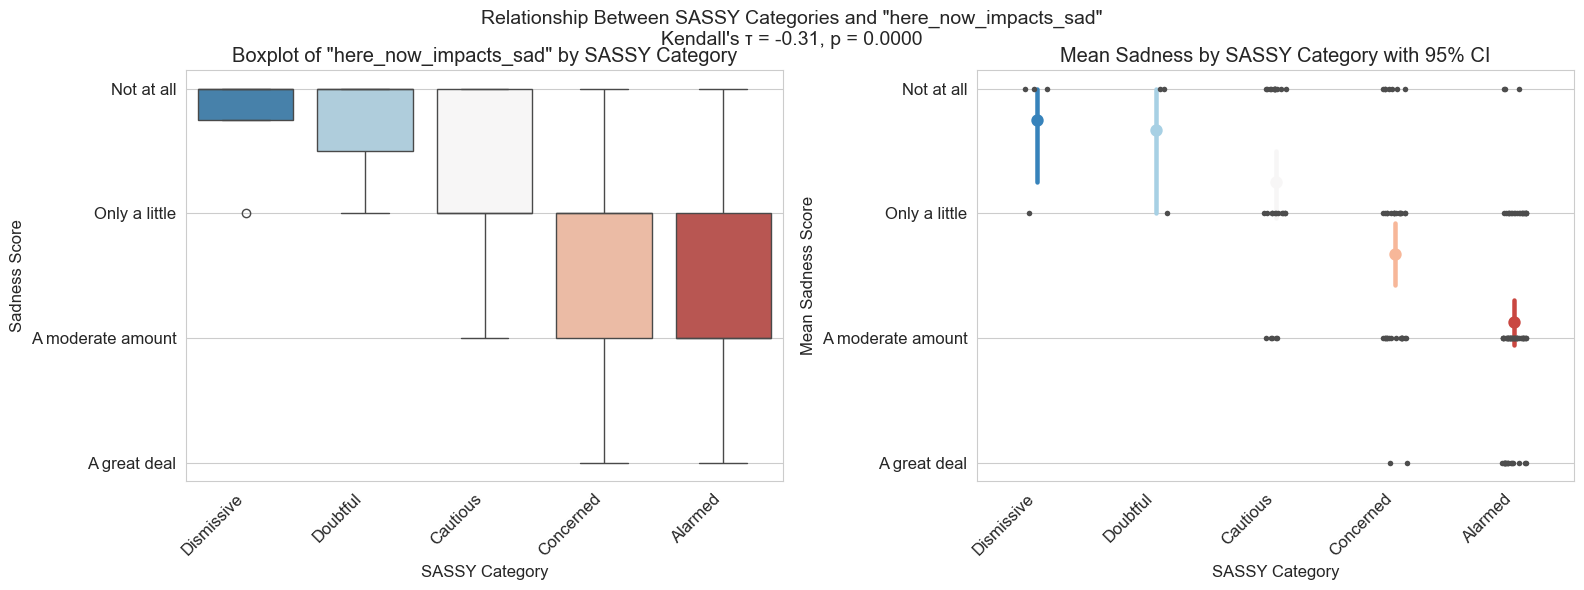

In [18]:
# Plot Sassy vs emotions
# Set the aesthetics for the plots
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Convert SASSY to numeric for correlation
sassy_numeric = full_analysis_df['SASSY'].cat.codes

# Create boxplot
sns.boxplot(
    x='SASSY', 
    y='here_now_impacts_sad',
    data=full_analysis_df,
    palette='RdBu_r',
    ax=ax1
)
# Add in points to show each observation
sns.stripplot(full_analysis_df, x="SASSY", y="here_now_impacts_sad", size=4, color=".3") #Probably remove this.
                                                                                              #Need to figure out how I want to visualize
ax1.set_title('Boxplot of "here_now_impacts_sad" by SASSY Category')
ax1.set_xlabel('SASSY Category')
ax1.set_ylabel('Sadness Score')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
#sns.despine(trim=True, left=True)

# Create point plot with error bars
sns.pointplot(
    x='SASSY',
    y='here_now_impacts_sad',
    data=full_analysis_df,
    palette='RdBu_r',
    ci=95,
    join=True,  # Connect points with lines to show trend
    markers='o',
    scale=1.2,
    ax=ax2
)
ax2.set_title('Mean Sadness by SASSY Category with 95% CI')
ax2.set_xlabel('SASSY Category')
ax2.set_ylabel('Mean Sadness Score')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Calculate Kendall's Tau
valid_data = full_analysis_df[['here_now_impacts_sad', 'SASSY']].dropna()
tau, p_value = kendalltau(
    valid_data['here_now_impacts_sad'], 
    valid_data['SASSY'].cat.codes
)

# Add annotation with correlation information
correlation_info = f"Kendall's τ = {tau:.2f}, p = {p_value:.4f}"
fig.suptitle(f'Relationship Between SASSY Categories and "here_now_impacts_sad"\n{correlation_info}', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### Rural/Urban vs Emotions in each exhibit

In [19]:
#Run Kendall's Tau on rural/urban vs emotions
# Initialize dictionary to store Kendall's Tau results
kendall_results_urb = {}

# Run Kendall's Tau test for each emotion column
for col in emotion_columns:
    x = numeric_df[col]
    y = full_analysis_df['rural/urban']
    
    # Only select valid (non-null) pairs without modifying the whole DataFrame
    valid_mask = x.notna() & y.notna()
    tau, p_value = kendalltau(x[valid_mask], y[valid_mask])
    # Store results
    kendall_results_urb[col] = {
        'tau': tau,
        'p_value': p_value,
        'direction': 'Positive' if tau > 0 else 'Negative'
    }

# Convert results to DataFrame for easier viewing
kendall_df_urb = pd.DataFrame.from_dict(kendall_results_urb, orient='index')
kendall_df_urb = kendall_df_urb.round(6)  # Round to 6 decimal places
kendall_df_urb = kendall_df_urb.sort_values('tau', ascending=False)  # Sort by tau value

print("Kendall's Tau results for urban/rural vs emotion columns:")
display(kendall_df_urb)

Kendall's Tau results for urban/rural vs emotion columns:


,tau,p_value,direction
build_momentum_happy,0.117892,0.097953,Positive
here_now_impacts_inspired,0.101319,0.156066,Positive
build_momentum_anxious,0.083041,0.267200,Positive
build_momentum_indifferent,0.078602,0.287423,Positive
here_now_impacts_interested,0.064372,0.378927,Positive
here_now_impacts_optimistic_hopeful,0.062468,0.388925,Positive
here_now_impacts_afraid_scared,0.059633,0.402369,Positive
build_momentum_optimistic_hopeful,0.054191,0.447674,Positive
here_now_impacts_guilty,0.051694,0.475436,Positive
build_momentum_inspired,0.047347,0.503809,Positive


### Utah Residence vs Emotions in each exhibit

In [20]:
#run Mann-Whitney U Test on UT residence vs emotions in each exhibit
mw_ut_results = []
for emotion in emotion_columns:

    #Get emotion scores for ut and non ut
    ut_scores = numeric_df[emotion][full_analysis_df['UT?'] == 1.0].dropna()
    non_ut_scores = numeric_df[emotion][full_analysis_df['UT?'] == 0.0].dropna()
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(ut_scores, non_ut_scores, alternative='two-sided')
    
    mw_ut_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

mw_ut_results_df = pd.DataFrame(mw_ut_results)
display(mw_ut_results_df)


,emotion,statistic,p_value,significant
0,aspen_indifferent,3002.0,0.771683,False
1,aspen_sad,2894.0,0.891685,False
2,aspen_hopeless,2994.0,0.796315,False
3,aspen_interested,2733.0,0.443930,False
4,aspen_afraid_scared,2774.0,0.530937,False
5,aspen_optimistic_hopeful,2627.5,0.248050,False
6,aspen_anxious,2770.0,0.536693,False
7,aspen_inspired,2829.0,0.707567,False
8,aspen_angry_frustrated,2804.0,0.600376,False
9,aspen_happy,2896.5,0.902936,False
